# Data processing: step 3

Make cuts on the events, define a signal region, split into train-test, preprocess

In [72]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
codes = {"od": "Open data",
       "sim_zmm_forcms_1k-mz90.1-mw80.4_8000030": "Sim Z->MM (mZ=90)",
      #  "sim_wp_wzpythia_forcms_1k-mz50.0-mw40.0-mwp1000_8000199": "Sim W`->WZ (mZ=50)",
      #  "sim_wp_wzpythia_forcms_1k-mz70.0-mw60.0-mwp1200_8000200": "Sim W`->WZ (mZ=70)",
        }


In [74]:
uncut_data = {}
for code in codes.keys():
    uncut_data[code] = np.load(f"compiled_data/{code}.npy")

In [75]:
# plotting params

labels = "$\mu\mu$ $p_T$", "$\mu\mu$ $\eta$", "$\mu\mu$ $\phi$", "$\mu\mu$ $M$", "jet $p_T$", "jet $\eta$", "jet $\phi$", "jet $M$", "jet $\\tau_{21}$"

n_bins = 60

colors = {"od": "blue",
       "sim_zmm_forcms_1k-mz90.1-mw80.4_8000030": "orange",
        "sim_wp_wzpythia_forcms_1k-mz50.0-mw40.0-mwp1000_8000199": "red",
        "sim_wp_wzpythia_forcms_1k-mz70.0-mw60.0-mwp1200_8000200": "green",
        }

bins = [np.linspace(0, 800, n_bins),
       np.linspace(-6, 6, n_bins),
       np.linspace(-3.2, 3.2, n_bins),
       np.linspace(20, 120, n_bins),
       np.linspace(0, 800, n_bins),
       np.linspace(-6, 6, n_bins),
       np.linspace(-3.2, 3.2, n_bins),
       np.linspace(20, 120, n_bins),
       np.linspace(0, 1, n_bins),]

## Visualize the data

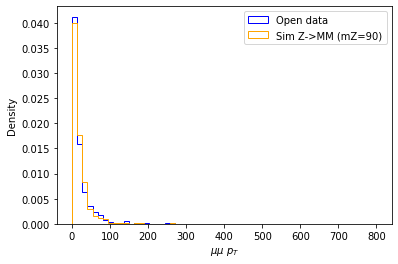

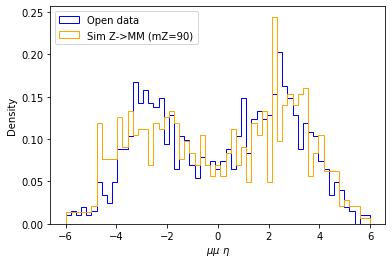

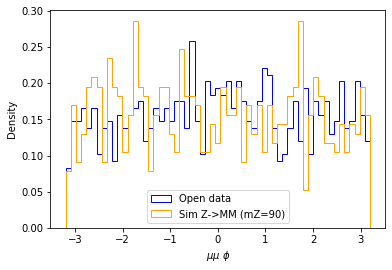

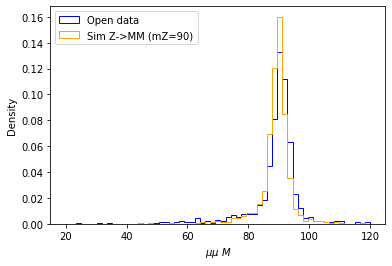

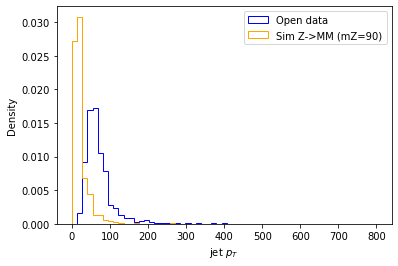

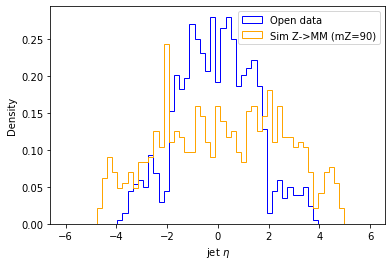

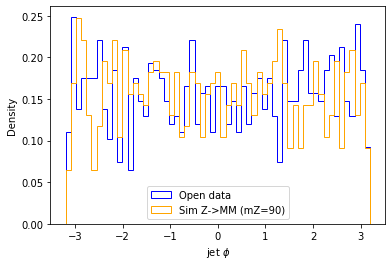

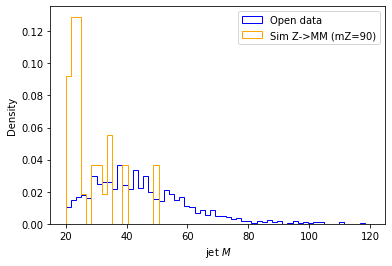

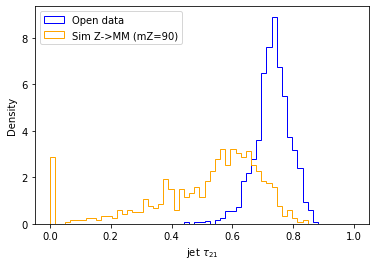

In [76]:
for i in range(9):
    plt.figure()
    for code in codes.keys():
        plt.hist(uncut_data[code][:,i], bins = bins[i], density = True, label = codes[code], histtype = "step", color = colors[code])
    plt.xlabel(labels[i])
    plt.legend()
    plt.ylabel("Density")
    plt.show()


## Make cuts

Now let's define cuts on the data. 

Muon cuts were made previously (and we don't want to make cuts on the dimuon system, either)

In [84]:
# jet_cuts

cut_data = {}
for code in codes.keys():
    # pt_cut, eta cut
    pass_indices = (uncut_data[code][:,4] > 50) & (np.abs(uncut_data[code][:,5]) < 2.1)
    cut_data[code] = uncut_data[code][pass_indices]


    
    

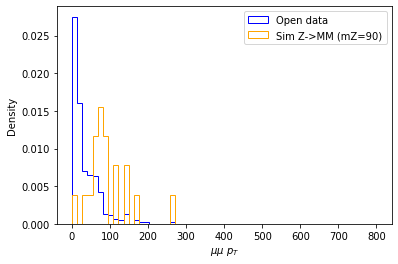

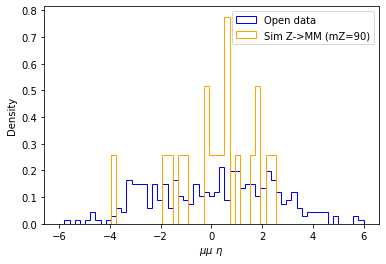

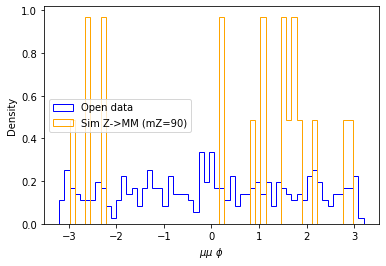

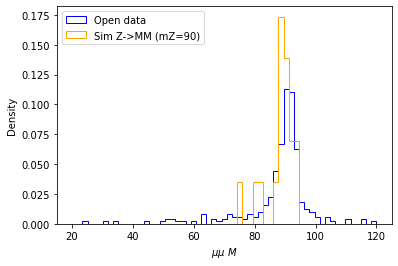

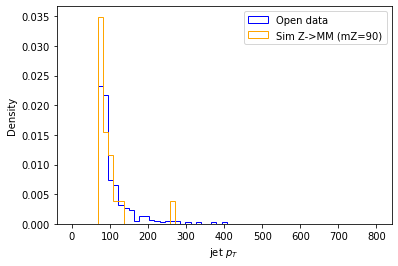

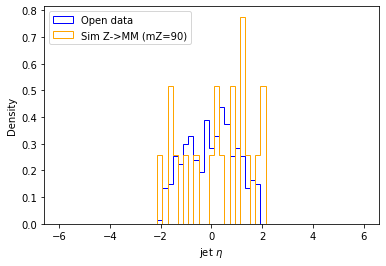

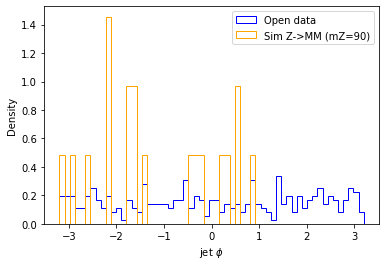

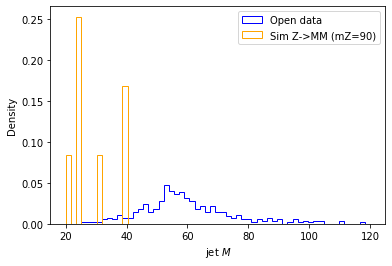

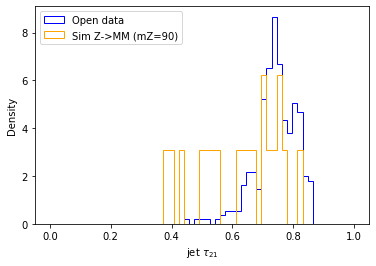

In [85]:
for i in range(9):
    plt.figure()
    for code in codes.keys():
        plt.hist(cut_data[code][:,i], bins = bins[i], density = True, label = codes[code], histtype = "step", color = colors[code])
    plt.xlabel(labels[i])
    plt.legend()
    plt.ylabel("Density")
    plt.show()

## Train test split

Signal region is defined as the Z mass window: 75 - 105

In [86]:
SR_data_preprocc = {}
SB_data_preprocc = {}

for code in codes.keys():

    pass_indices = (cut_data[code][:,3] > 75) & (cut_data[code][:,3] < 105)
    
    SR_data_preprocc[code] = cut_data[code][pass_indices]
    SB_data_preprocc[code] = cut_data[code][~pass_indices]


    
    

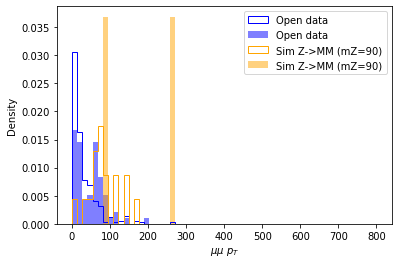

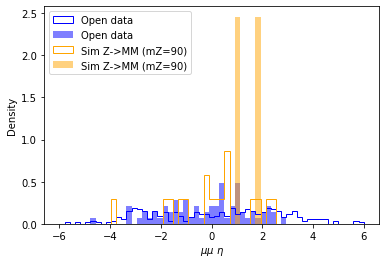

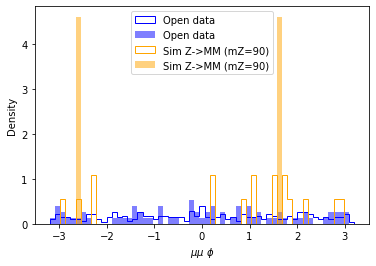

/global/homes/r/rmastand/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


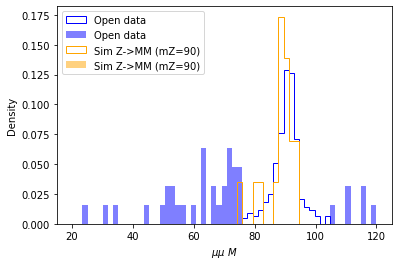

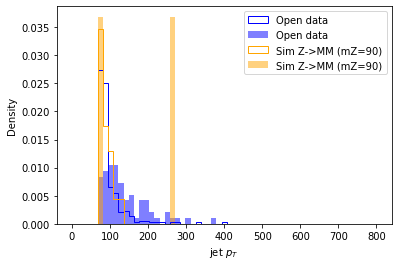

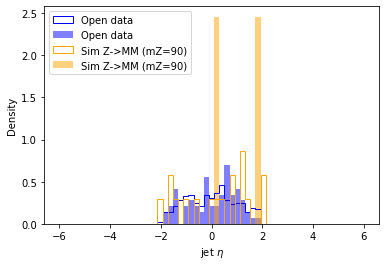

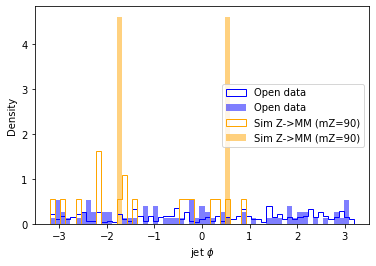

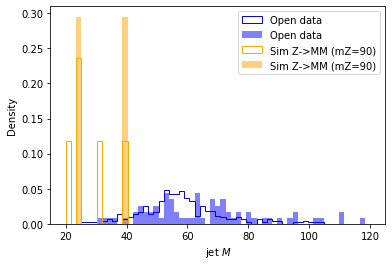

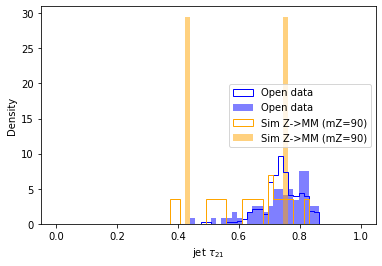

In [87]:
for i in range(9):
    plt.figure()
    for code in codes.keys():
        plt.hist(SR_data_preprocc[code][:,i], bins = bins[i], density = True, label = codes[code], histtype = "step", color = colors[code])
        plt.hist(SB_data_preprocc[code][:,i], bins = bins[i], density = True, label = codes[code], histtype = "stepfilled", color = colors[code], alpha = 0.5)

    plt.xlabel(labels[i])
    plt.legend()
    plt.ylabel("Density")
    plt.show()

## Preprocessing

Standard scaling is fine

In [88]:
from sklearn.preprocessing import StandardScaler

SR_data_procc = {}
SB_data_procc = {}

for code in codes.keys():
    
    scaler = StandardScaler()
    
    SB_data_procc[code] = scaler.fit_transform(SB_data_preprocc[code])
    SR_data_procc[code] = scaler.transform(SR_data_preprocc[code])



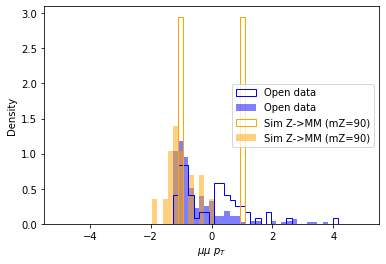

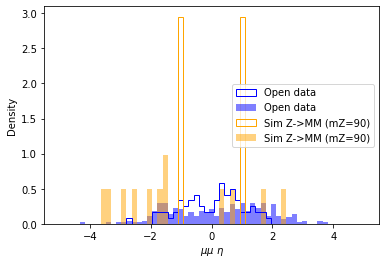

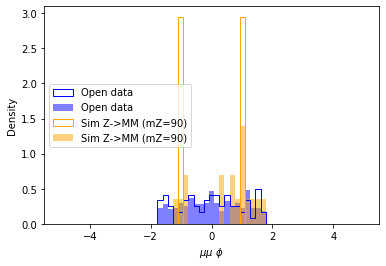

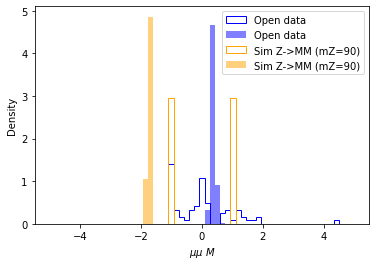

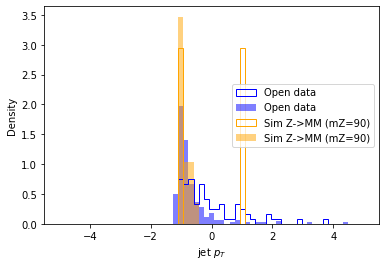

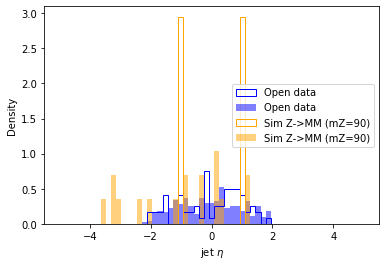

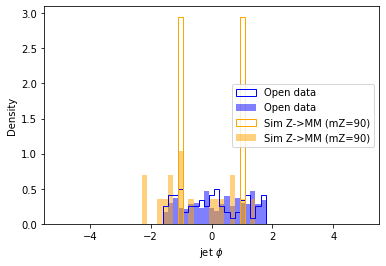

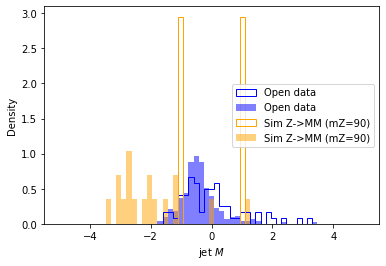

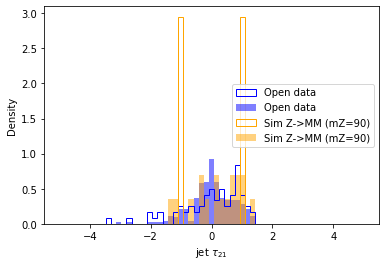

In [89]:
for i in range(9):
    plt.figure()
    for code in codes.keys():
        plt.hist(SB_data_procc[code][:,i], bins = np.linspace(-5, 5, n_bins), density = True, label = codes[code], histtype = "step", color = colors[code])
        plt.hist(SR_data_procc[code][:,i], bins = np.linspace(-5, 5, n_bins), density = True, label = codes[code], histtype = "stepfilled", color = colors[code], alpha = 0.5)

    plt.xlabel(labels[i])
    plt.legend()
    plt.ylabel("Density")
    plt.show()

In [90]:
for code in codes.keys():
    
    np.save(f"processed_data/{code}_SB.npy", SB_data_procc[code])
    np.save(f"processed_data/{code}_SR.npy", SR_data_procc[code])
